# B. Normalize the data (5 marks)

Repeat Part A but use a normalized version of the data. Recall that one way to normalize the data is by subtracting the mean from the individual predictors and dividing by the standard deviation.

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense

/home/jupyterlab/conda/envs/python/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.
/home/jupyterlab/conda/envs/python/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/jupyterlab/conda/envs/python/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/jupyterlab/conda/envs/python/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
import pandas as pd

# get data
! wget https://cocl.us/concrete_data
    
# load data
df = pd.read_csv('./concrete_data')
df.head()

--2020-02-15 20:27:44--  https://cocl.us/concrete_data
Resolving cocl.us (cocl.us)... 169.48.113.194, 158.85.108.83, 158.85.108.86
Connecting to cocl.us (cocl.us)|169.48.113.194|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv [following]
--2020-02-15 20:27:46--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58988 (58K) [text/csv]
Saving to: ‘concrete_data.1’

concrete_data.1     100%[===================>]  57.61K  --.-KB/s    in 0.02s   

2020-02-15 20:27:47 (

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
# get all predictor columns
x_cols = df.columns.tolist()[:-2]
print(x_cols)

# set target column
y_col = 'Strength'
print(y_col)

['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate']
Strength


In [4]:
# define baseline model:
def baseline_model():
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(len(x_cols),)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [10]:
# create a normalization function

def normalize(df):
    return (df-df.mean())/df.std()

normalized_X = normalize(df[x_cols])
normalized_X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569


In [11]:
# split data based on sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# create a empty list for saving mean squared error
mse_list = []

# create a loop that runs model on different training subsets 50 times
for i in range(50):

    # randomly split data by hodling 30%, based on normalized X
    X_train, X_test, y_train, y_test = train_test_split(normalized_X, df[y_col], train_size=0.7, random_state=2020)
    
    # train the model
    baseline = baseline_model().fit(X_train, y_train, epochs=50, verbose=0)
    
    # run the model on test set
    y_predict = baseline.model.predict(X_test)
    
    # calculate mean_squared_error and append to the list
    mse_list.append(mean_squared_error(y_true=y_test, y_pred=y_predict))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_split.py:217

The mean of MSE is : 373.186206609543

The standard deviation of MSE is : 107.74787717798195


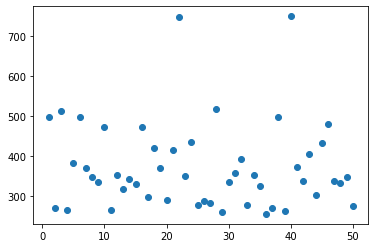

In [12]:
# plot mse
import matplotlib.pyplot as plt
%matplotlib inline
# calculate the std and mean
import numpy as np
mse_array = np.array(mse_list)

print(f'The mean of MSE is : {np.mean(mse_array)}')
print(f'\nThe standard deviation of MSE is : {np.std(mse_array)}')

# plot the mse
plt.scatter(x=list(range(1,51,1)), y=mse_list)
plt.show()


# How does the mean of the mean squared errors compare to that from Step A?

Result comparizon:

| | Mean | Standard Deviation |
|-|-|-|
|Part A | 413.0374606447627 | 383.27311673708095 |
|Part B | 373.186206609543 | 107.74787717798195 |


* The result after normailization has smaller MSE, indicating that model has better regression prediction accuracy. Moreover, the standard deviation of the MSE is reduced, indicating that the model becomes more stable after normalizing the features